<a href="https://colab.research.google.com/github/ZOUHDIYassine/ALGO/blob/main/3_strategies/E_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/d9w/evolution/raw/master/imgs/logo.png" width="20%" align="right" style="margin:0px 20px">


# Evolutionary Algorithms

## Evolving Neural Networks with ES

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a>&nbsp;| Dennis G. Wilson, Yuri Lavinas, Paul Templier | <a href="https://d9w.github.io/evolution/">https://d9w.github.io/evolution/</a>

In order to visualize the environment in this notebook, you will need to install the following:

In [1]:
!apt-get install -y xvfb python-opengl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl


In [2]:
!pip install cma swig pyvirtualdisplay pygame box2d-py==2.3.8

  Using cached cma-4.0.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached swig-4.2.1.post0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (3.5 kB)
  Using cached PyVirtualDisplay-3.0-py3-none-any.whl.metadata (943 bytes)
  Using cached box2d-py-2.3.8.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
Using cached cma-4.0.0-py3-none-any.whl (283 kB)
Using cached swig-4.2.1.post0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.8 MB)
Using cached PyVirtualDisplay-3.0-py3-none-any.whl (15 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (box2d-py)


In [3]:
!apt-get update
!apt-get install -y build-essential python3-dev


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [4]:
!pip install --upgrade gym

In [5]:
!apt-get install -y swig

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 52 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 0s (3,199 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [6]:
!pip install Box2D-kengz

  Using cached Box2D-kengz-2.3.3.tar.gz (425 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for Box2D-kengz: filename=Box2D_kengz-2.3.3-cp310-cp310-linux_x86_64.whl size=2367279 sha256=f6cf50dbdf8911270f7157ae03440e3a28943f212f983e6feec3391f5fd042b9
  Stored in directory: /root/.cache/pip/wheels/ab/a3/5f/6396406aa0163da86c2a8d28304a120b55cfa98363654d853b
Successfully built Box2D-kengz


In [7]:
!pip install gym[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached swig-4.2.1.post0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.3 MB/s eta 0:00:00
Using cached swig-4.2.1.post0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.8 MB)
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2349136 sha256=59846bcfb8ccc0537448b429cfd6d09b17742cf3259ea5f66c5470e36f91ea30
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
  Attempting uninstall: pygame
    Found existing installation: pygame 2.6.1
    Uninstalling pygame-2.6.1:
      Successfully uninstalled pygame-2.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

In [8]:
!pip install torch

# <a name="neuroevolution">3.</a> ES for Neuroevolution

Evolutionary strategies are intended for continuous optimization and can easily be applied to the optimization of neural network parameters, or *neuroevolution*.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.multiprocessing as mp
import numpy as np
import gym

In [ ]:
class NeuralNetwork(nn.Module):

    def __init__(self, input_shape, n_actions):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(input_shape, 32)
        self.l2 = nn.Linear(32, 32)
        self.lout = nn.Linear(32, n_actions)

    def forward(self, x):
        x = F.relu(self.l1(x.float()))
        x = F.relu(self.l2(x))
        return self.lout(x)

    def get_params(self):
        p = np.empty((0,))
        for n in self.parameters():
            p = np.append(p, n.flatten().cpu().detach().numpy())
        return p

    def set_params(self, x):
        start = 0
        for p in self.parameters():
            e = start + np.prod(p.shape)
            p.data = torch.FloatTensor(x[start:e]).reshape(p.shape)
            start = e

In [9]:
!pip install pyvirtualdisplay

  Using cached PyVirtualDisplay-3.0-py3-none-any.whl.metadata (943 bytes)
Using cached PyVirtualDisplay-3.0-py3-none-any.whl (15 kB)


In [10]:
!sudo apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 52 not upgraded.
Need to get 7,815 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

We'll add some visualization functionality to have the environment render directly in the notebook.

In [18]:
from pyvirtualdisplay import Display
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
pydisplay = Display(visible=0, size=(1400, 900))
pydisplay.start()
plt.ion();

Following the framework of evolutionary policy search, we will optimize a neural network representing a policy and maximize the total reward over a single episode using this policy.

In [ ]:
def evaluate(ann, env, visul=True):
    obs, info = env.reset(seed=0)
    if visul:
        img = plt.imshow(env.render())
    total_reward = 0
    while True:
        # Output of the neural net
        net_output = ann(torch.tensor(obs))
        # the action is the value clipped returned by the nn
        action = net_output.data.cpu().numpy().argmax()
        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward
        if visul:
            img.set_data(env.render())
            plt.axis('off')
            display.display(plt.gcf())
            display.clear_output(wait=True)
        if done:
            break
    return total_reward

We've configured this for discrete action spaces. We can see a random neural network on different environments like `CartPole-v0`, `MountainCar-v0`, and `LunarLander-v2`.

In [ ]:
env = gym.make('LunarLander-v2', render_mode='rgb_array')
ann = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)

-434.73778251123355

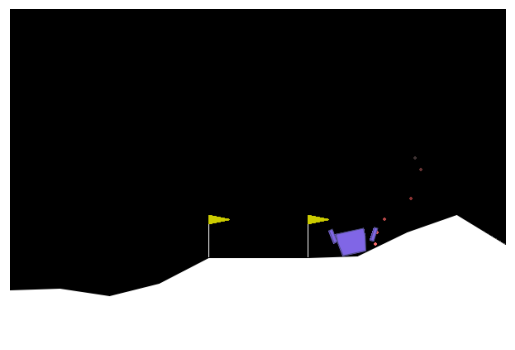

In [ ]:
evaluate(ann, env, visul=True)

In order to evolve the parameters of this neural network, we will modify the parameters of the network using `set_params` with the genes of the new individual. In the evolutionary literature, this is referred to as a *direct encoding* as the neural network parameters are directly encoded in the genome.

In [ ]:
def fitness(x, ann, env, visul=False):
    ann.set_params(x)
    return -evaluate(ann, env, visul=visul)

In [ ]:
p = ann.get_params()
np.shape(p)

(1476,)

We can first observe a random individual $x$.

-434.73778251123355

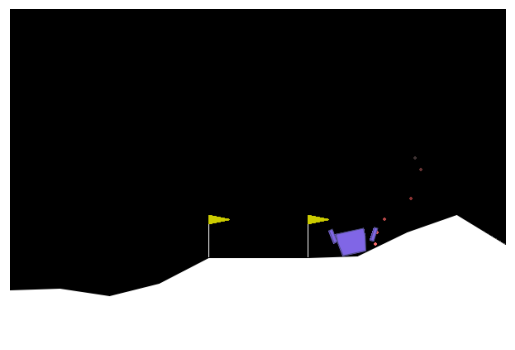

In [ ]:
x = np.random.rand(len(p))
-fitness(x, ann, env, visul=True)

Let's try optimizing the policy using the simple $(\mu, \lambda)$ ES we proposed.

In [ ]:
def mu_lambda(x, fitness, gens=200, lam=10, alpha=0.2, verbose=False):
    x_best = x
    f_best = fitness(x)
    fits = np.zeros(gens)
    for g in range(gens):
        N = np.random.normal(size=(lam, len(x)))
        F = np.zeros(lam)
        for i in range(lam):
            ind = x + N[i, :]
            F[i] = fitness(ind)
            if F[i] < f_best:
                f_best = F[i]
                x_best = ind
                if verbose:
                    print(g, " ", f_best)
        fits[g] = f_best
        mu_f = np.mean(F)
        std_f = np.std(F)
        A = F
        if std_f != 0:
            A = (F - mu_f) / std_f
        x = x - alpha * np.dot(A, N) / lam
    return fits, x_best

In [ ]:
np.random.seed(654)
env = gym.make('LunarLander-v2', render_mode='rgb_array')
ann = NeuralNetwork(env.observation_space.shape[0], env.action_space.n)
x = np.random.randn(len(ann.get_params()))
f = lambda x : fitness(x, ann, env)
fits, x = mu_lambda(x, f, gens=10, lam=10, alpha=0.1, verbose=True)

0   119.05959591305864
0   92.39587218088589
3   20.581424356249684


In [ ]:
fits

array([92.39587218, 92.39587218, 92.39587218, 20.58142436, 20.58142436,
       20.58142436, 20.58142436, 20.58142436, 20.58142436, 20.58142436])

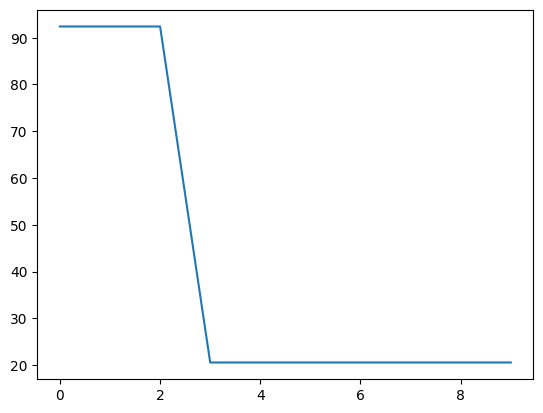

In [ ]:
plt.plot(fits);

-20.581424356249684

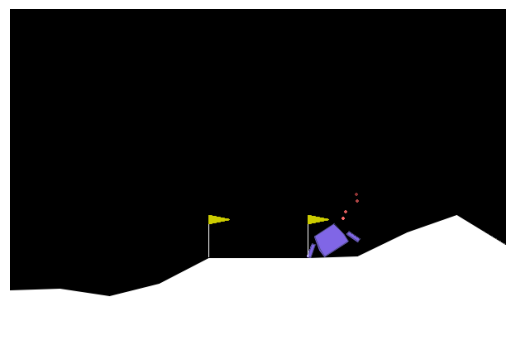

In [ ]:
-fitness(x, ann, env, visul=True)

NEAT

In [11]:
!pip install neat-python

In [12]:
# Crée un fichier de configuration complet pour NEAT
config_content = """
[NEAT]
fitness_criterion     = max
fitness_threshold     = 200
pop_size              = 150
reset_on_extinction   = False

[DefaultGenome]
activation_default      = tanh
activation_mutate_rate  = 0.0
activation_options      = tanh
aggregation_default     = sum
aggregation_mutate_rate = 0.0
aggregation_options     = sum

bias_init_mean          = 0.0
bias_init_stdev         = 1.0
bias_max_value          = 30.0
bias_min_value          = -30.0
bias_mutate_rate        = 0.7
bias_replace_rate       = 0.1
bias_mutate_power       = 0.5

compatibility_disjoint_coefficient = 1.0
compatibility_weight_coefficient   = 0.5

conn_add_prob           = 0.5
conn_delete_prob        = 0.5

enabled_default         = True
enabled_mutate_rate     = 0.01

feed_forward            = True
initial_connection      = full

node_add_prob           = 0.2
node_delete_prob        = 0.2

num_hidden              = 0
num_inputs              = 4
num_outputs             = 2
response_init_mean      = 1.0
response_init_stdev     = 0.0
response_max_value      = 30.0
response_min_value      = -30.0
response_mutate_rate    = 0.0
response_replace_rate   = 0.0
response_mutate_power   = 0.5

weight_init_mean        = 0.0
weight_init_stdev       = 1.0
weight_max_value        = 30
weight_min_value        = -30
weight_mutate_rate      = 0.8
weight_replace_rate     = 0.1
weight_mutate_power     = 0.5

[DefaultSpeciesSet]
compatibility_threshold = 3.0

[DefaultStagnation]
species_fitness_func = max
max_stagnation       = 20
species_elitism      = 2

[DefaultReproduction]
elitism            = 2
survival_threshold = 0.2
"""

# Écrire le contenu dans un fichier
with open("config-feedforward", "w") as config_file:
    config_file.write(config_content)


In [10]:
!ls

config-feedforward  sample_data


In [13]:
import neat
import gym
import numpy as np

# Charger le fichier de configuration NEAT
config_path = "config-feedforward"
config = neat.config.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path
)



In [14]:
# Fonction pour évaluer un génome
def eval_genome(genome, config, visul=True):
    net = neat.nn.FeedForwardNetwork.create(genome, config)
    observation = env.reset()
    if visul:
        img = plt.imshow(env.render())
    total_reward = 0

    done = False
    while not done:
        action = net.activate(observation)
        action = np.argmax(action)  # Choix de l'action
        observation, reward, done, _ = env.step(action)
        total_reward += reward
        if visul:
            img.set_data(env.render())
            plt.axis('off')
            display.display(plt.gcf())
            display.clear_output(wait=True)
        if done:
            break

    return total_reward


In [15]:
# Fonction pour évaluer tous les génomes
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = eval_genome(genome, config)



In [16]:
np.random.seed(654)
env = gym.make('LunarLander-v2', render_mode='rgb_array')


 ****** Running generation 0 ****** 



RuntimeError: Expected 4 inputs, got 2

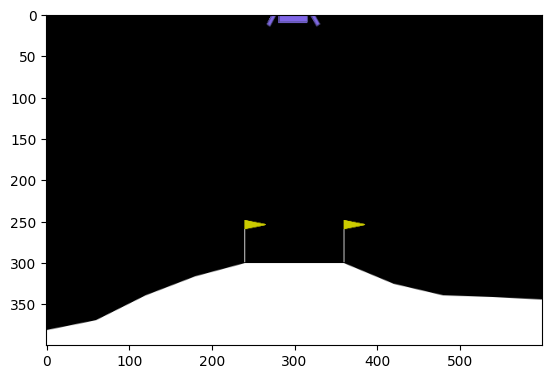

In [19]:
# Initialisation de la population
population = neat.Population(config)

# Ajout des rapports de statistiques
population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

# Exécution de l'algorithme NEAT pour un certain nombre de générations
winner = population.run(eval_genomes, 50)

print("\nLe meilleur génome est :\n{!s}".format(winner))

In [ ]:
def evaluate(ann, env, visul=True):
    obs, info = env.reset(seed=0)
    if visul:
        img = plt.imshow(env.render())
    total_reward = 0
    while True:
        # Output of the neural net
        net_output = ann(torch.tensor(obs))
        # the action is the value clipped returned by the nn
        action = net_output.data.cpu().numpy().argmax()
        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward
        if visul:
            img.set_data(env.render())
            plt.axis('off')
            display.display(plt.gcf())
            display.clear_output(wait=True)
        if done:
            break
    return total_reward